# Machine Learning for EEG Dataset : DEAP

http://www.eecs.qmul.ac.uk/mmv/datasets/deap/

## Imports

In [1]:
#Imports
import pickle
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import loadmat
from scipy.signal import butter,filtfilt, welch
import scipy.signal as sg
import plotly as py
import plotly.graph_objs as go
from plotly import tools
from scipy.fftpack import fft, ifft
from plotly.subplots import make_subplots
import scipy.stats as sts
from scipy.integrate import simps
import glob
import os
import ctypes
import numpy as np
from numpy.ctypeslib import ndpointer


# py.offline.init_notebook_mode(connected=True)

Misc Function

In [84]:
def single_plot(x,y,mode='lines', title='Plotly Fast Single Plot'):
    layout = go.Layout(title = title)
    trace = go.Scatter(
            x = x,
            y = y,
            mode = 'lines'
        )

    fig = go.Figure(data = [trace], layout = layout)
    py.offline.iplot(fig)


## Loading and Viewing

In [2]:
file_name = r"C:\Users\Aditi\Documents\Machine Learning\Upwork Project\data_preprocessed_python\data_preprocessed_python\s27.dat"

In [6]:
#Last time, the following function worked for you instead of the one I used
#loaded = pickle.load(open('s01.dat', 'rb'), encoding="bytes")

In [3]:
#Load data from file
# "rb" implies Reading Binary data from the file
with open(file_name, 'rb') as f:
    loaded = pickle.load(f, encoding="bytes")  #the specification of encoding is to supress errors in loading the file.
    #encoding-'latin-1' / 'utf-8'

In [4]:
#Loaded is the dictionary that has the following data
loaded.keys()

dict_keys([b'labels', b'data'])

In [6]:
y = loaded[b'labels']

In [16]:
y

array([[6.03, 5.04, 9.  , 6.  ],
       [7.  , 7.03, 9.  , 8.1 ],
       [9.  , 8.04, 9.  , 9.  ],
       [7.05, 7.01, 9.  , 7.08],
       [4.97, 1.  , 9.  , 1.  ],
       [7.  , 5.04, 8.08, 7.96],
       [4.94, 5.04, 9.  , 7.03],
       [8.24, 8.17, 8.01, 9.  ],
       [8.99, 9.  , 9.  , 9.  ],
       [6.01, 5.04, 7.06, 7.03],
       [9.  , 5.04, 9.  , 8.05],
       [4.18, 5.04, 8.96, 5.04],
       [7.01, 7.14, 9.  , 8.03],
       [8.06, 7.03, 9.  , 9.  ],
       [5.04, 3.06, 9.  , 5.04],
       [8.06, 6.06, 8.95, 8.03],
       [9.  , 7.08, 9.  , 9.  ],
       [9.  , 8.99, 9.  , 9.  ],
       [5.06, 2.  , 9.  , 4.04],
       [6.97, 5.04, 9.  , 6.06],
       [9.  , 8.14, 9.  , 8.12],
       [7.29, 5.04, 9.  , 8.08],
       [8.  , 6.04, 9.  , 8.03],
       [8.9 , 7.97, 8.97, 7.99],
       [4.  , 1.  , 9.  , 6.04],
       [5.04, 2.06, 9.  , 6.08],
       [4.97, 1.  , 9.  , 1.  ],
       [5.04, 2.01, 9.  , 7.06],
       [7.18, 5.04, 9.  , 7.03],
       [7.08, 7.04, 8.96, 8.  ],
       [5.

In [9]:
x = loaded[b'data']
x.shape
#This is the shape of dataset for ONE patient - s02.
# 40 trials x 40 channels x 8064 datapoints

(40, 40, 8064)

In [10]:
#We need only the first 32 EEG channels:
data = x[:,:32, :]
data.shape
#40 trials x 32 channels x 8064 data points

(40, 32, 8064)

In [11]:
labels = loaded[b'labels']
labels.shape #4 values of (valence, arousal, dominance, liking) [1-9 range] etc for each of the 40 trials.

(40, 4)

In [13]:
labels

array([[9.  , 5.03, 7.13, 6.62],
       [8.01, 7.1 , 8.04, 8.08],
       [9.  , 9.  , 8.96, 8.05],
       [6.05, 1.  , 5.04, 7.03],
       [5.04, 3.  , 3.65, 5.04],
       [5.  , 4.94, 5.04, 1.01],
       [4.96, 1.99, 4.08, 1.  ],
       [9.  , 9.  , 9.  , 9.  ],
       [9.  , 7.  , 9.  , 7.18],
       [4.99, 1.  , 9.  , 1.  ],
       [7.08, 1.  , 7.01, 7.  ],
       [8.01, 6.06, 7.12, 9.  ],
       [9.  , 4.99, 9.  , 9.  ],
       [8.94, 9.  , 8.97, 9.  ],
       [9.  , 8.01, 8.06, 9.  ],
       [6.  , 5.05, 8.05, 6.14],
       [9.  , 3.  , 6.03, 7.41],
       [9.  , 6.15, 9.  , 8.08],
       [9.  , 8.32, 8.06, 6.99],
       [8.97, 9.  , 8.03, 9.  ],
       [1.  , 1.  , 5.04, 1.  ],
       [5.  , 1.  , 4.97, 5.  ],
       [1.  , 2.97, 1.  , 7.82],
       [7.08, 9.  , 6.06, 9.  ],
       [9.  , 9.  , 8.1 , 9.  ],
       [9.  , 8.04, 9.  , 9.  ],
       [4.96, 5.01, 3.01, 5.05],
       [4.06, 4.97, 7.14, 7.04],
       [2.99, 7.04, 7.03, 9.  ],
       [2.01, 7.05, 1.  , 7.13],
       [4.

In [ ]:
labels[3]
#(valence, arousal, dominance, liking)

In [ ]:
labels[30]
#(valence, arousal, dominance, liking)

In [14]:
#Creating a time vector for future use
time = np.linspace(0,8063/128,8064)

In [15]:
channel_names = ["Fp1", "AF3", "F3", "F7", "FC5", "FC1", "C3", "T7","CP5", "CP1", "P3", "P7", "PO3", "O1", "Oz", "Pz", 
                "Fp2", "AF4", "Fz", "F4", "F8", "FC6", "FC2", "Cz", "C4", "T8", "CP6", "CP2", "P4", "P8", "PO4", "O2"]
channel_labels = dict(list(enumerate(channel_names)))


In [16]:
channel_labels

{0: 'Fp1',
 1: 'AF3',
 2: 'F3',
 3: 'F7',
 4: 'FC5',
 5: 'FC1',
 6: 'C3',
 7: 'T7',
 8: 'CP5',
 9: 'CP1',
 10: 'P3',
 11: 'P7',
 12: 'PO3',
 13: 'O1',
 14: 'Oz',
 15: 'Pz',
 16: 'Fp2',
 17: 'AF4',
 18: 'Fz',
 19: 'F4',
 20: 'F8',
 21: 'FC6',
 22: 'FC2',
 23: 'Cz',
 24: 'C4',
 25: 'T8',
 26: 'CP6',
 27: 'CP2',
 28: 'P4',
 29: 'P8',
 30: 'PO4',
 31: 'O2'}

#### Plotting random sample for viewing

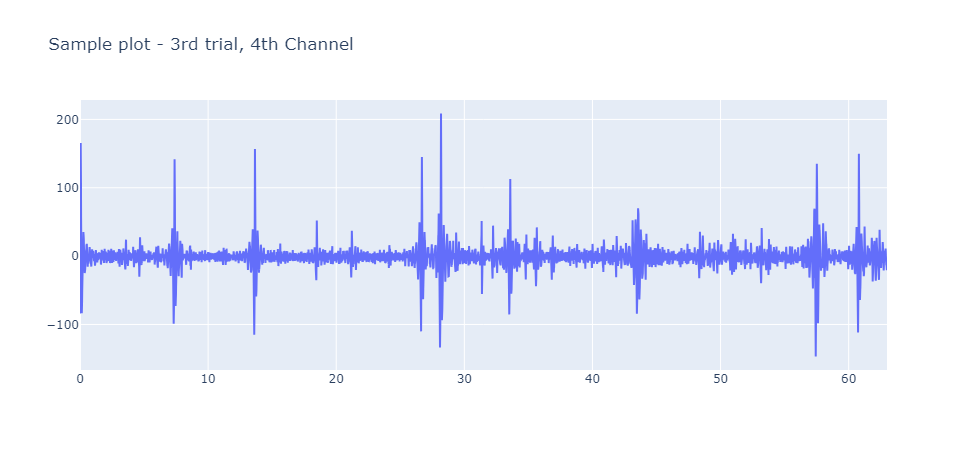

In [51]:
single_plot(time,data[3,4], title="Sample plot - 3rd trial, 4th Channel")

In [ ]:
single_plot(time,data[30,30], title="Sample plot - 30th trial, 30th Channel")

## Pre-processing

####  FIR Filter

In [27]:
def FIR_split(data, tim, fs = 128, n = 51, plotshow = True, ret = False, yrange = False):

    #Filter the data based on the different cut-off frequencies for each MEG band
    cutoffs = np.array([[0.5, 4], [4, 7.5], [7.5, 12], [12, 30], [30, 75]]) #Cutoff frequencies for the bands - delta, theta, alpha, beta gamma respectively
    if fs/2<75: #cutoff frequency cannot exceed fs/2
        cutoffs[4,1] = 128/2 - 1
    
    splits = []
    for i in range(5):
        #Desigining the FIR filter with the specific cut-off frequency and window to get the filter co-efficients
        hfilt = sg.firwin(n, cutoff = cutoffs[i]/fs, window = 'blackmanharris', pass_zero = False)
        #Convolve the signal with filter to get filered signal
        yfilt = sg.convolve(data,hfilt, mode="same")
        splits.append(yfilt)
    
    #Plot the data sequentially using subplots
    if plotshow:
        splits.insert(0,data)
        cutoffs = np.insert(cutoffs,0, [np.nan], axis=0)
        
        fig = go.Figure()
        fig = make_subplots(rows=6, cols=1,shared_xaxes=True, vertical_spacing=0.05,
                        subplot_titles=("Full Signal","Delta","Theta", "Alpha","Beta","Gamma"))
        
        for i in range(6):
            fig.append_trace(go.Scatter(
                x = tim,        
                y = splits[i],
                        name = 'Signal Cut-off: ' + str(cutoffs[i])
                        ),row=i+1,col=1)
            if yrange:
                fig.update_yaxes(range=[-400, 400], row=i+1, col=1)
        fig.update_layout(
            autosize=False,
            width=980,
            height=800,
        )
        fig.show()
        splits = splits[1:]
    
    #Return the filtered data to form the channels for the dataset
    if ret:
        return np.array(splits) #Delta Theta Alpha Beta Gamma

In [28]:
sp = FIR_split(data[5,11], time, n=51, ret=True, yrange=True, plotshow=True)

In [21]:
sp.shape
#5 channels representing the frequency bands - Delta Theta Alpha Beta Gamma

(5, 8064)

In [54]:
#Filter function to split according to frequency bands (same as above without the plotting functionality)
def FIR_filter(data, tim, fs = 128, n = 51):

    #Filter the data based on the different cut-off frequencies for each MEG band
    cutoffs = np.array([[0.5, 4], [4, 7.5], [7.5, 12], [12, 30], [30, 75]]) #Cutoff frequencies for the bands - delta, theta, alpha, beta gamma respectively
    if fs/2<75: #cutoff frequency cannot exceed fs/2
        cutoffs[4,1] = 128/2 - 1
    
    splits = []
    for i in range(5):
        #Desigining the FIR filter with the specific cut-off frequency and window to get the filter co-efficients
        hfilt = sg.firwin(n, cutoff = cutoffs[i]/fs, window = 'blackmanharris', pass_zero = False)
        #Convolve the signal with filter to get filered signal
        yfilt = sg.convolve(data,hfilt, mode="same")
        splits.append(yfilt)
    
    return np.array(splits) #Delta Theta Alpha Beta Gamma

In [57]:
#To apply this function over the entire dataset without using multiple for loops- 
#This also speeds up the process due to numpy's in-built vectorization
filtered = np.apply_along_axis(FIR_filter, 2, data, time, n=51)

In [63]:
filtered.shape
#40 trials x 32 channel electrodes x 5 frequency bands x 8064 datapoints

(40, 32, 5, 8064)

______________

## Feature Functions

#### 1. Shannon Entropy

In [17]:
def spectral_entropy(x, fs, nperseg=None, normalize=False):
    x = np.array(x)
    # Compute and normalize power spectrum
    _, psd = welch(x, fs, nperseg=nperseg)
    psd_norm = np.divide(psd, psd.sum())
    se = -np.multiply(psd_norm, np.log2(psd_norm)).sum()
    if normalize:
        se /= np.log2(psd_norm.size)
    return se

In [18]:
spectral_entropy(data[8,9], 128)

4.3108668313287755

In [19]:
spectral_entropy(data[9,19], 128, normalize=True)

0.49731393756286346

In [1]:
def shannon_entropy(x):
    weights = np.ones_like(x) / len(x)
    px = np.histogram(x, weights=weights)[0]
    px = px[px!=0]
    return -sum(px*np.log(px))

In [14]:
shannon_entropy(data[8,9])

0.7592429927252109

In [16]:
shannon_entropy(data[9,19])

0.9964360613684554

______________

#### 2. Welch PSD

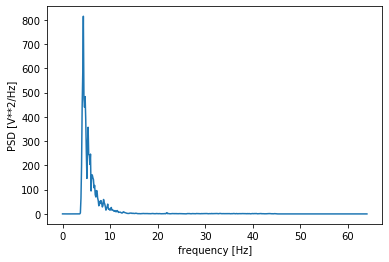

In [92]:
f, Pxx = welch(data[9,8], 128, nperseg=1024)
plt.plot(f, Pxx)
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

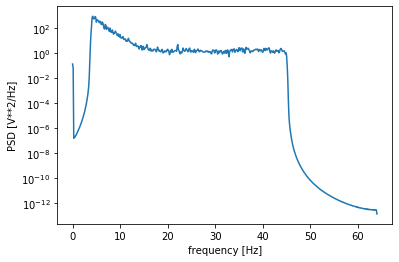

In [89]:
plt.semilogy(f, Pxx)
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

Log of PSD?

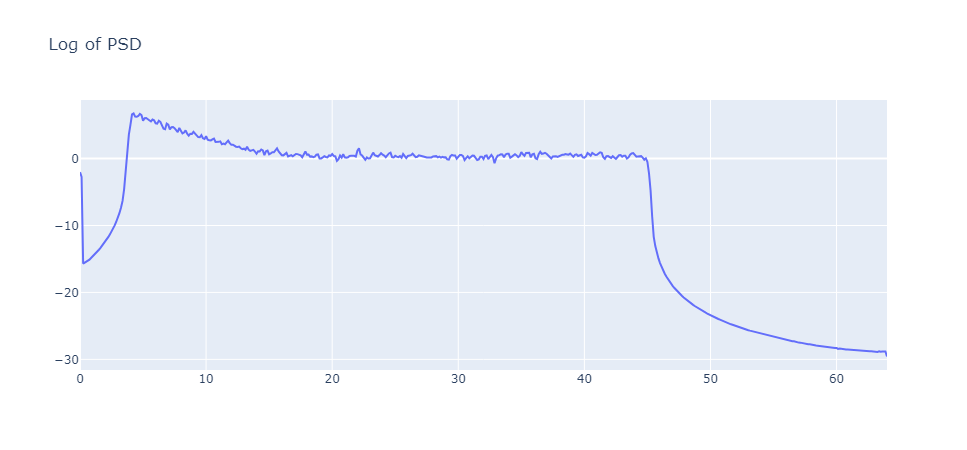

In [65]:
single_plot(f, np.log(Pxx), title="Log of PSD")

In [30]:
#Calculating the power of the PSD spectrum for the specified frequency band (as used in the MATLAB codes)
def PSD_power(data, fs, freq, nparseg=1024):
    f, Pxx = welch(data, fs, nperseg=nparseg)
    freq_res = f[1] - f[0]
    idx = np.logical_and(f >= freq[0], f <= freq[1])
    power = simps(Pxx[idx], dx=freq_res)
    return power, np.log(power)

In [42]:
PSD_power(sp[1], 128, [4,7.5])

(77.99925819919393, 4.356699316377624)

_________

#### 3. Oscillation Feature

<b> Pseudocode from the paper </b>

Get the signal x(t), with t = 1,2,...N samples <br>
Set local minima, Lmin = 0<br>
Set local maxima, Lmax = 0<br>
for t = 0 to N-2<br>
- if x(t) > x(t+1) and x(t+2) > x(t+1)
        then Lmin = Lmin +1
- if x(t) <x(t+1) and x(t+2) < x(t+1)
        then Lmax = Lmax +1

END for

Then, the oscillation feature, O, was calculated as<br>
- O = N/(Lmin + Lmax)
______________________

<i>Essentially, this code excerpt finds the total number of peaks in the entire signal forming the denominator. <br>
The final oscillation feature is the ratio of the entire signal to the number of peaks.

In [66]:
#Function following the pseudocode exactly
def oscillation(x):
    N = len(x)
    Lmin = 0
    Lmax = 0
    for t in range(0,N-2):
        if x[t] > x[t+1] and x[t+2] > x[t+1]:
            Lmin += 1
        if x[t] < x[t+1] and x[t+2] < x[t+1]:
            Lmax += 1
    return N/(Lmin+Lmax)

In [67]:
oscillation(data[7,8])

2.2233250620347396

In [68]:
#Function using scipy's - "find_peaks" function.
def oscillation_signal(x):
    N = len(x)
    O = N/(len(sg.find_peaks(x)[0]) + len(sg.find_peaks(-x)[0]))
    return O

In [69]:
oscillation_signal(data[7,8])

2.2233250620347396

<b> Note: </b>
- Both functions give exactly the same values (tested).
- The function using scipy is faster and hence will be used in the main code

________

#### 4. Higuchi Fractal Dimension

In [5]:
#Found a section of code from git repo - https://github.com/inuritdino/HiguchiFractalDimension/blob/master/hfd.py
#Based on Gaussian noise test values- this code works reasonably well.
# from hfd import hfd #Importing function from python file in the same directory

<b><u> Note:</b>
- I transferred the HFD function from the python file to the notebook itself.
- You can still use the one from the file as well, I just thought this might speed up the process

In [89]:
def hfd(X,**kwargs):
    k, L = curve_length(X,**kwargs)
    return lin_fit_hfd(k, L);

def curve_length(X,opt=False,num_k=50,k_max=None):
    ### Make sure X is a NumPy array with the correct dimension
    X = np.array(X)
    if X.ndim != 1:
        raise ValueError("Input array must be 1D (time series).")
    N = X.size

    ### Get interval "time"
    k_arr = interval_t(N,num_val=num_k,kmax=k_max)

    ### The average length
    Lk = np.empty(k_arr.size,dtype=np.float)

    for i in range(k_arr.size):# over array of k's
        Lmk = 0.0
        for j in range(k_arr[i]):# over m's
            ## Construct X_k^m, i.e. X_(k_arr[i])^j, as X[j::k_arr[i]]
            ## Calculate L_m(k)
            Lmk += (
                np.sum(
                    np.abs(
                        np.diff( X[j::k_arr[i]] )
                    )
                )
                * (N - 1) /
                (
                    ( (N-j-1)//k_arr[i] )
                    *
                    k_arr[i]
                )
            ) / k_arr[i]

        ### Calculate the average Lmk
        Lk[i] = Lmk / k_arr[i]

    return (k_arr, Lk);

def lin_fit_hfd(k,L,log=True):
    if log:
        return (-np.polyfit(np.log2(k),np.log2(L),deg=1)[0]);
    else:
        return (-np.polyfit(k,L,deg=1)[0]);


def interval_t(size,num_val=50,kmax=None):
    ### Generate sequence of interval times, k
    if kmax is None:
        k_stop = size//2
    else:
        k_stop = kmax
    if k_stop > size//2:## prohibit going larger than N/2
        k_stop = size//2
        print("Warning: k cannot be longer than N/2")
        
    k = np.logspace(start=np.log2(2),stop=np.log2(k_stop),base=2,num=num_val,dtype=np.int)
    return np.unique(k);


In [90]:
#Testing HFD Values for known random distributions
i = np.arange(2 ** 15) +1001
z = np.random.normal(size=int(2 ** 15) + 1001)
t = np.array([np.sum(z[1:j]) for j in i])
hfd(t)# should be ~1.50

1.4791706132317637

In [91]:
#Testing HFD Values for known random distributions
x = np.random.randn(10000)
y = np.empty(9900)
for i in range(x.size-100):
    y[i] = np.sum(x[:(i+100)])
## Note: x is a Guassian noise, y is the original Brownian data used in Higuchi, Physica D, 1988.

In [92]:
hfd(y) # should be ~1.50

1.5774750360128325

In [93]:
hfd(x) # should be ~2.00

2.0002047223643538

In [94]:
#Testing HFD on the data
hfd(data[23,23])

NameError: name 'data' is not defined

________________

#### 5. Stat Features

- The means of the raw signals
- The standard deviations of the raw signals
- The skewness of the raw signals
- The kurtosis of the raw signals
- The means of the absolute values of the first differences of the raw signals
- The means of the absolute values of the first differences of the normalized signals
- The means of the absolute values of the second differences of the raw signals
- The means of the absolute values of the second differences of the normalized signals


<b><u> Note:</b>
- I added 2 features: Skewness and Kurtosis based on the MATLAB codes given


In [77]:
#Normalising function of a single signal
def norm(x):
    x = (x-min(x))/(max(x)-min(x))
    return x

In [96]:
def stats(x):
    mean = np.mean(x)
    std = np.std(x)
    skew = sts.skew(x)
    kurt = sts.kurtosis(x)
    norm_x = norm(x)
    
    #np.diff calculates the first difference of input array
    #fd and sd stand for first difference and second difference respectively
    fd_raw = np.mean(abs(np.diff(x))) 
    fd_norm = np.mean(abs(np.diff(norm_x)))
    sd_raw = np.mean(abs(np.diff(np.diff(x))))
    sd_norm = np.mean(abs(np.diff(np.diff(norm_x))))
    return np.array([mean, std, skew, kurt, fd_raw, fd_norm, sd_raw, sd_norm])
    

In [79]:
stat_features = stats(data[7,8])
stat_features

array([ 3.44495573e-01,  3.63881622e+01, -1.11682204e+00,  2.49662272e+01,
        9.45565678e+00,  1.40649027e-02,  1.10296329e+01,  1.64061279e-02])

In [80]:
stat_features.shape

(8,)

_______

#### 6. Comparing hemispheres

Calculating the mean absolute difference between the left and right channels respectively

In [18]:
hemi = {
    "Fp1":"Fp2", "AF3":"AF4", "F3":"F4", "F7":"F8", "FC5":"FC6", "FC1":"FC2", "C3":"C4", "T7":"T8",
    "CP5":"CP6", "CP1":"CP2", "P3":"P4", "P7":"P8", "PO3":"PO4","O1":"O2","Fp2":"Fp1", "AF4":"AF3", 
    "F4":"F3", "F8":"F7", "FC6":"FC5", "FC2":"FC1", "C4":"C3", "T8":"T7","CP6":"CP5", "CP2":"CP1", 
    "P4":"P3", "P8":"P7", "PO4":"PO3","O2":"O1"}

In [19]:
channel_ind

{'AF3': 1,
 'AF4': 17,
 'C3': 6,
 'C4': 24,
 'CP1': 9,
 'CP2': 27,
 'CP5': 8,
 'CP6': 26,
 'Cz': 23,
 'F3': 2,
 'F4': 19,
 'F7': 3,
 'F8': 20,
 'FC1': 5,
 'FC2': 22,
 'FC5': 4,
 'FC6': 21,
 'Fp1': 0,
 'Fp2': 16,
 'Fz': 18,
 'O1': 13,
 'O2': 31,
 'Oz': 14,
 'P3': 10,
 'P4': 28,
 'P7': 11,
 'P8': 29,
 'PO3': 12,
 'PO4': 30,
 'Pz': 15,
 'T7': 7,
 'T8': 25}

In [20]:
def hemispheric_diff(sig, features, channel_labels=channel_labels, channel_ind=channel_ind, hemi=hemi):
    hemi_ratio = []
    
    for ch in range(len(sig)):
        #Get label of the channel of interest
        lab = channel_labels[ch]
        
        #return NaN values for centre electrodes
        if lab[-1] == 'z':
            hemi_ratio.append([np.nan]*3)
    
        else:
            #Find index of the corresponding left/right channel
            r = hemi[lab]
            ind = channel_ind[r]
            #Obtain value for each channel
            left = sig[ch]
            right = sig[ind]
            #Append mean absolute value of the difference
            mdiff = np.mean(left-right)
            
 
    return hemi_ratio

In [21]:
hemi_diff = hemispheric_diff(data[23])

In [22]:
hemi_diff

[-0.5345865296766956,
 0.5979630360513797,
 0.8032399847497816,
 -0.255232740862496,
 -0.5147264714957053,
 0.19913707536944728,
 -0.05069387634183301,
 0.3623501359149287,
 0.7047049697973818,
 0.06707831151071966,
 0.4131384130790436,
 -0.45738978708797134,
 0.7234679929022414,
 0.5195047130059411,
 nan,
 nan,
 0.5345865296766956,
 -0.5979630360513797,
 nan,
 -0.8032399847497816,
 0.255232740862496,
 0.5147264714957053,
 -0.19913707536944728,
 nan,
 0.05069387634183301,
 -0.3623501359149287,
 -0.7047049697973818,
 -0.06707831151071966,
 -0.4131384130790436,
 0.45738978708797134,
 -0.7234679929022414,
 -0.5195047130059411]

__________

Refer <i>FeatureExtraction.ipynb </i> for execution of these functions across the entire data